## sim-EPSP
- **fast-rising** phase was produced by injecting current according to the following equation: 
    - `y = A1[1 – exp(–t/τrise1)][exp(–t/τdecay1)] + A2[1 – exp(–t/τrise2][exp(–t/τdecay2]`, in which 
        - y is the amplitude of the injected current, 
        - t is time, 
        - A1 = 150 pA, 
        - τrise1 = 0.01 ms, 
        - τdecay1 = 1 ms, 
        - A2 = 70 pA, 
        - τrise2 = 3 ms, and 
        - τdecay2 = 20 ms
- **slow-rising** sim-EPSP, current was injected according to the following equation: 
    - `y = A[1 – exp(–t/τrise)] × [exp(–t/τdecay)]`, in which 
        - A = 150 pA, 
        - τrise = 10 ms, and 
        - τdecay = 15 ms.

In [27]:
import generate_sim_epsp as simepsp
import numpy as np

args_sampling_rate = 10 #kHz
args_duration = 0.150 #s

args_slow_A = 150 #pA
args_slow_tauRise = 10 #ms
args_slow_tauDecay = 15 #ms

args_fast_A1 = 150 #pA
args_fast_A2 = 70 #pA
args_fast_tauRise1 = 0.01 #ms
args_fast_tauDecay1 = 1 #ms
args_fast_tauRise2 = 3 #ms
args_fast_tauDecay2 = 20 #ms

In [28]:
dt = 1.0 / (args_sampling_rate * 1000)  # Convert kHz to ms
time = np.arange(0, args_duration, dt) # s
time

array([0.000e+00, 1.000e-04, 2.000e-04, ..., 1.497e-01, 1.498e-01,
       1.499e-01], shape=(1500,))

In [29]:
slow_rise = simepsp.single_exponential(
    time,
    A=args_slow_A,
    tau_rise=args_slow_tauRise/1000,
    tau_decay=args_slow_tauDecay/1000
)
slow_rise

array([0.        , 1.48260787, 2.9308592 , ..., 0.00694756, 0.0069014 ,
       0.00685554], shape=(1500,))

In [30]:
fast_rise = simepsp.double_exponential(
    time,
    A1=args_fast_A1,
    A2=args_fast_A2,
    tau_rise1=args_fast_tauRise1/1000,
    tau_decay1=args_fast_tauDecay1/1000,
    tau_rise2=args_fast_tauRise2/1000,
    tau_decay2=args_fast_tauDecay2/1000
)
fast_rise

array([0.00000000e+00, 1.38002878e+02, 1.27279204e+02, ...,
       3.93010219e-02, 3.91050072e-02, 3.89099702e-02], shape=(1500,))

Text(0.5, 0, 'time (s)')

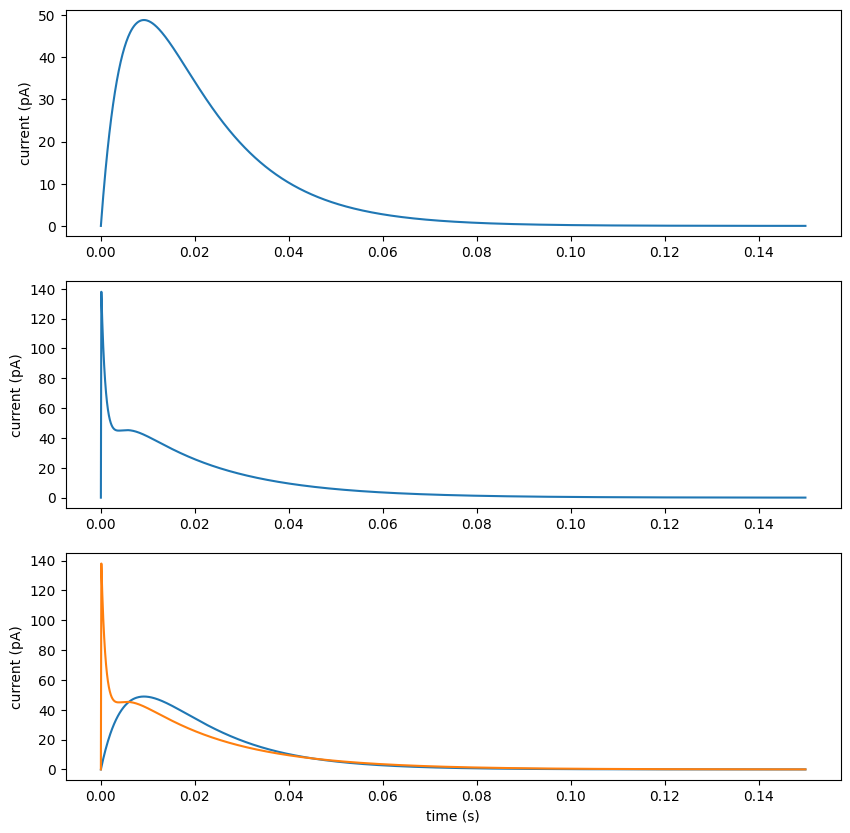

In [31]:
import matplotlib.pyplot as plt
# import matplotlib

# matplotlib.use()
fig,ax = plt.subplots(3,1,figsize=(10,10))
ax[0].plot(time,slow_rise)
ax[0].set_ylabel("current (pA)")
ax[1].plot(time,fast_rise)
ax[1].set_ylabel("current (pA)")
ax[2].plot(time,slow_rise)
ax[2].plot(time,fast_rise)
ax[2].set_ylabel("current (pA)")
ax[2].set_xlabel("time (s)")
# plt.show()